In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [128]:
from sklearn.model_selection import train_test_split

In [165]:
x = df.drop(['target', 'flower_name'], axis=1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [166]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [167]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [168]:
model.score(x_test, y_test)

1.0

In [171]:
y_predicted = model.predict(x_test)
y_predicted

array([0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       2])

In [178]:
y_test_np = np.array(y_test)
y_test_np

array([0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       2])

In [179]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_np)
cm

array([[18,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 15]], dtype=int64)

Text(24.0, 0.5, 'Truth')

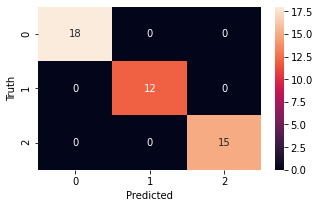

In [183]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')